# Solution for Homework #3

In [10]:
# Importing packages
import os # to manage directories
import time
import numpy as np # arrays
import pandas as pd # dataframes and data import
from tqdm import tqdm
import matplotlib.pyplot as plt # to plot static 
from matplotlib.gridspec import GridSpec
from main import *

In [11]:
# Setting working directory
os.chdir('/home/maria-fernanda/PhD/Spring_2025/TA/notebooks/Homework3/FE_HWK3/')


In [ ]:
# Reading Excel with logs and header from current directory
df = pd.read_excel('HW2_data.xlsx',skiprows=37,header=None)
# New values for the first row to remove ~A (manually) character and change NPHI name
new_values='DEPTH        SP           RWA          RSFL         RILM         RILD         DT           GR           CALI         DPHI         NPHI_SS RHOB         '
# Change the contents of the first row
df.iloc[0] = new_values
#print(df.iloc[0])
#df.iloc[0]
df.columns 

We currently only have one column with all logs within it as strings, so we need to separate them into columns based on the space characters presence and then convert them to numerical values

In [ ]:
# Separate the one column into their corresponding
df2 = df[0].str.split(expand=True)
# Set the first row as the header
df2.columns = df2.iloc[0]  # Set the first row as the header
# Remove the first row from the data and Reset the index
df2 = df2[1:].reset_index(drop=True) # reseting index for the data rows

# Now, we need to convert all values to numerical, as they are currently objects (Text/Strings)
df2 = df2.apply(pd.to_numeric, errors='coerce') #coerces the conversion of nonnumerical values to NaN
df2.head() # reading the first values of the dataframe to check

Then we check the data ranges with the describe function, finding values such as -999.25 which should be considered as NaN as well

In [ ]:
df2.describe()

Data QC'ing further:

In [ ]:
# We then replace them with NaN and check for the statistics again
df2.replace(-999.250000, np.nan, inplace=True)
df2.describe()

# Solution

### 1. Plot the logs

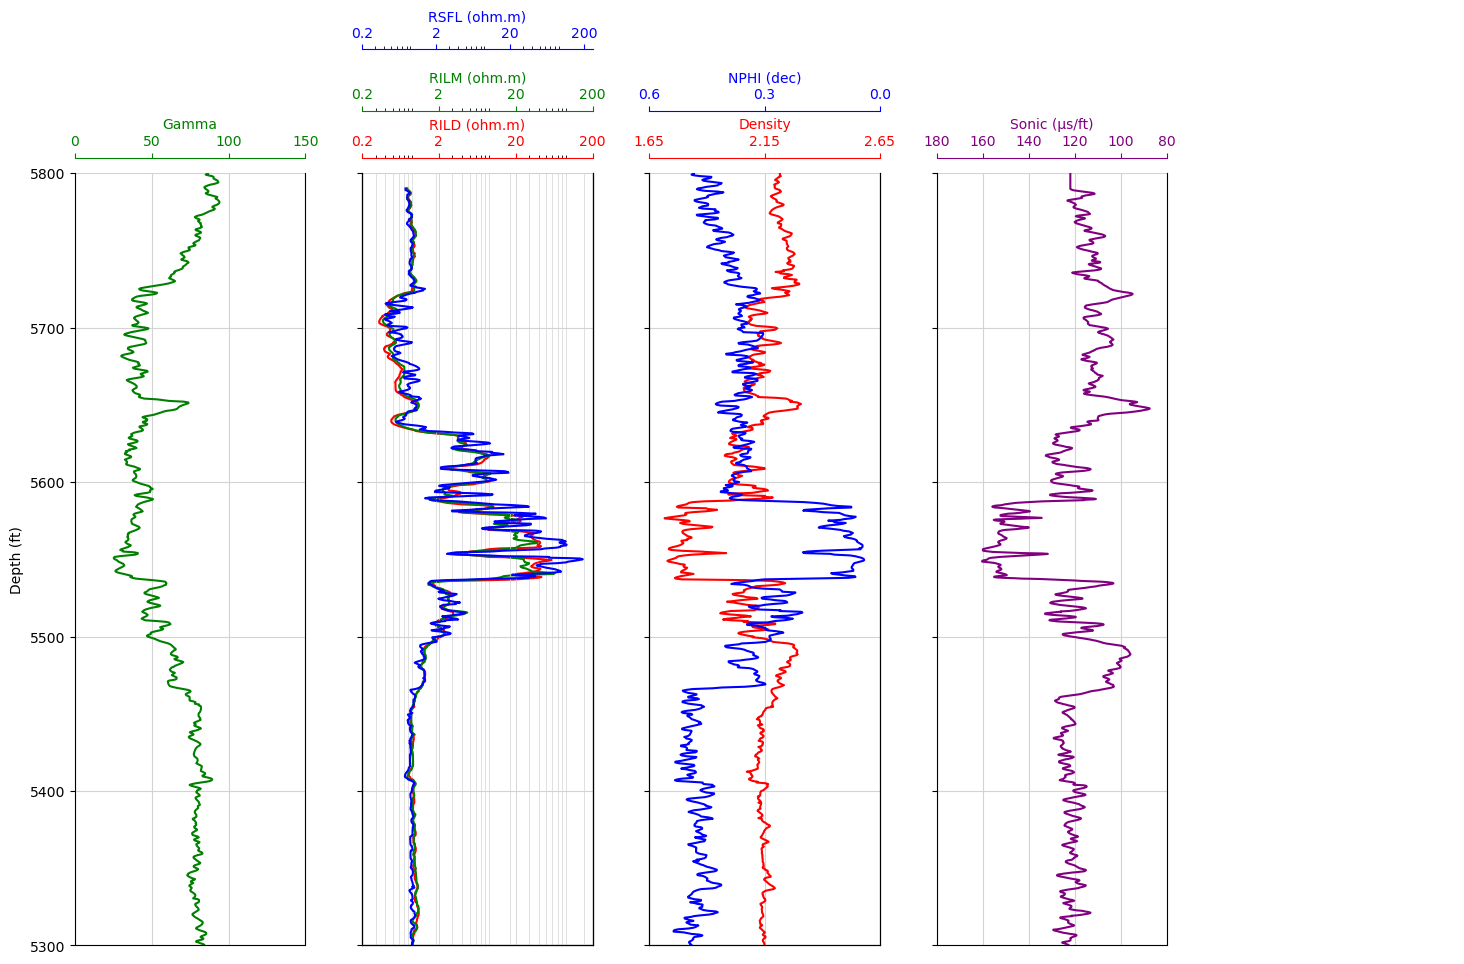

In [170]:
import matplotlib.pyplot as plt

# Assuming df2 is already defined and contains the necessary data
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)
plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 5), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 5), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 5), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track

# Set common y-limits for all subplots
common_ylim = (5300, 5800)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])
ax1.set_ylim(common_ylim)

# Resistivity track
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density track
ax3.plot("RHOB", "DEPTH", data=df2, color="red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.65, 2.65)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.65, 2.15, 2.65])
ax3.set_ylim(common_ylim)

# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)

# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])

# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4]:
    ax.set_yticklabels([])

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))


# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2]

# Set specific x-ticks and add gridlines for all resistivity-related axes
for ax in resistivity_axes:
    ax.set_xticks([0.2, 2, 20, 200])
    ax.set_xticklabels([0.2, 2, 20, 200])  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
    
# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

### 2. Calculate and plot a formation temperature log using the data provided in the well-log header for surface and bottom-hole temperature. Assume a local linear geothermal gradient.